In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
#dane syntetyczne
np.random.seed(42)
n=100
data = {
    "student_id": np.arange(1,n+1),
    "score_math": np.random.normal(70,10,n),
    "score_english":np.random.normal(65,12,n)
}

In [4]:
data

{'student_id': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100]),
 'score_math': array([74.96714153, 68.61735699, 76.47688538, 85.23029856, 67.65846625,
        67.65863043, 85.79212816, 77.67434729, 65.30525614, 75.42560044,
        65.36582307, 65.34270246, 72.41962272, 50.86719755, 52.75082167,
        64.37712471, 59.8716888 , 73.14247333, 60.91975924, 55.87696299,
        84.65648769, 67.742237  , 70.67528205, 55.75251814, 64.55617275,
        71.1092259 , 58.49006423, 73.7569

In [5]:
df = pd.DataFrame(data)

In [7]:
df.head(8)

,student_id,score_math,score_english
0,1,74.967142,48.015551
1,2,68.617357,59.952256
2,3,76.476885,60.887426
3,4,85.230299,55.372673
4,5,67.658466,63.064571
5,6,67.658630,69.848610
6,7,85.792128,87.634231
7,8,77.674347,67.094934


In [8]:
#statystyki opisowe
df.describe()

,student_id,score_math,score_english
count,100.000000,100.000000,100.000000
mean,50.500000,68.961535,65.267655
std,29.011492,9.081684,11.444028
min,1.000000,43.802549,41.974745
25%,25.750000,63.990943,55.332074
50%,50.500000,68.730437,66.009286
75%,75.250000,74.059521,71.458045
max,100.000000,88.522782,97.642030


In [9]:
#korelacja pomiędzy ocenami z przedmiotów
corr = np.corrcoef(df["score_math"],df["score_english"])[0,1]
print(f"Korelacja (NumPy): {corr:.3f}\n")

Korelacja (NumPy): -0.136



In [10]:
#Test T-studenta dla dwóch prób(czy wyniki z matmy i ang. różnią się istotnie?)
t_stat,p_val = stats.ttest_rel(df["score_math"],df["score_english"])
print(f"Test t-Studenta (matma vs ang): t = {t_stat:.3f}, p={p_val:.4f}")
if p_val < 0.05:
    print("różnica statystycznie istotna!")
else:
    print("brak istotnej różnicy!")

Test t-Studenta (matma vs ang): t = 2.375, p=0.0195
różnica statystycznie istotna!


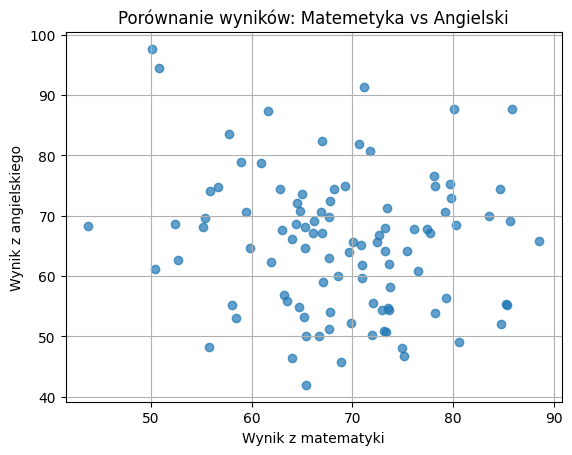

In [11]:
plt.scatter(df["score_math"],df["score_english"],alpha=0.7)
plt.title("Porównanie wyników: Matemetyka vs Angielski")
plt.xlabel("Wynik z matematyki")
plt.ylabel("Wynik z angielskiego")
plt.grid(True)
plt.show()